# Preprocessing, Modeling, and Evaluating the Data
We are now ready to model the data that we have cleaned. In this notebook, we will use all the features. Later, we will perform feature selection and determine if the performance of our models improves on a subset of features

We will use four supervised learning classification techniques:
* [Logistic Regression](#Logistic-Regression) 
* [Support Vector Machine (SVM)](#Support-Vector-Machine)
* [Random Forest](#Random-Forest)
* [Extreme Gradient Boosting (XGBoost)](#XGBoost)


We will also apply the oversampling technique [SMOTE](#Oversampling:-using-SMOTE), which is used for imbalanced data, to our training data. We will compare our models with and without SMOTE. 
In addition, before feeding the data into our logistic regression and SVM models, we will further preprocess our data through [standardization](#Scaling). Tree-based models do not require any scaling. We will also perform hyperparameter tuning on all our model types and then evaluate the models we created based on various classification metrics.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import preprocessing modules
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Import cross validation modules
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Import Classification Algorithms
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb

plt.style.use('seaborn')

### Load the data

In [2]:
df = pd.read_csv("../Capstone2/dataset_wrangled/df_clean.csv", index_col='symbol')

In [3]:
df.head()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,...,Treasury Stock,target,EPS,Shares Outstanding,ROTA,Debt-Equity Ratio,FCF,P/E,P/BV,P/S
symbol,,,,,,,,,,,,,,,,,,,,,
K,1.432000e+09,-50000000.0,4000000.0,51.0,-637000000.0,6.260000e+08,2.730000e+08,112000000.0,105000000.0,8.689000e+09,...,-2.999000e+09,0,4.98,3.628514e+08,0.183598,3.365021,2.444000e+09,12.244980,6.241658,1.495854
SWK,2.772400e+09,-500000.0,-7800000.0,7.0,-340300000.0,4.878600e+09,4.962000e+08,-101900000.0,442300000.0,6.985800e+09,...,-1.454400e+09,0,3.16,1.486392e+08,0.045219,1.431918,1.208300e+09,25.636077,1.770983,1.105768
AAP,2.609239e+09,-32428000.0,2698000.0,26.0,-195757000.0,5.312930e+08,1.112471e+09,-203513000.0,7000.0,3.241668e+09,...,-1.078900e+08,1,5.36,7.308918e+07,0.119145,2.670199,7.410070e+08,20.507462,5.298731,1.237172
AVY,1.477200e+09,-136000000.0,-36600000.0,14.0,-129200000.0,8.123000e+08,3.516000e+08,-75900000.0,124100000.0,4.502300e+09,...,-1.172200e+09,0,2.19,9.735160e+07,0.092591,2.089800,4.488000e+08,23.050228,3.293331,0.800376
CERN,3.765790e+08,-9599000.0,12042000.0,13.0,-352877000.0,8.128530e+08,2.023770e+08,-8111000.0,3443000.0,5.147220e+08,...,-2.825100e+07,0,1.16,3.434086e+08,0.143485,0.293813,1.048742e+09,47.913795,6.025466,6.557301


# Data Preprocessing

### Split the data into test and train sets

In [4]:
X = df.drop('target', axis=1)
y = df['target']

In [5]:
# Random Seed
seed = 42

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [7]:
X_train.shape, X_test.shape

((344, 78), (87, 78))

In [8]:
y_train.shape, y_test.shape

((344,), (87,))

### Oversampling:  using SMOTE
SMOTE stands for Synthetic Minority Oversampling Technique. It is used to synthesize new instances from the existing instances in the minority class. It does so by selecting instances that are close in the feature space through k-Nearest Neighbor.

> SMOTE first selects a minority class instance, $a$, at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors, $b$, at random and connecting $a$ and $b$ to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances $a$ and $b$.

-[Imbalanced Learning: Foundations, Algorithms, and Applications](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)


In [9]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
sm = SMOTE(random_state = seed) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, counts of label '1': 70
Before OverSampling, counts of label '0': 274 

After OverSampling, the shape of train_X: (548, 78)
After OverSampling, the shape of train_y: (548,) 

After OverSampling, counts of label '1': 274
After OverSampling, counts of label '0': 274


###  Metrics Report  
Function to output a summary of the classification metrics. The scores will be used to evaluate and compare each model.

In [10]:
# Empty lits to be used later on as a summary table
list_model=[]
list_accuracy=[]
list_recall=[]
list_precision=[]
list_f1=[]
list_auc =[]

In [11]:
def report_metrics(classifier, X, y, append=False, model_name=None):
    y_pred = classifier.predict(X)
    y_prob = classifier.predict_proba(X)[:,1]
    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred)
    precision = precision_score(y, y_pred)
    f1 = f1_score(y, y_pred, labels=np.unique(y_pred))
    fpr, tpr, thresholds = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)


    list_labels = ['Accuracy','Recall','Precision','F1 Score', 'AUC']
    list_scores = [accuracy, recall, precision, f1, roc_auc]
    
    # Summary of scores
    report  = pd.Series(list_scores, list_labels)
    print(report)
    
    # Barplot comparing the classification metrics for the model
    report.plot(kind='bar', yticks=np.arange(0.1, 1.1, .1))
    
    # Append scores to summary lists
    if append==True:
        list_model.append(model_name)
        list_accuracy.append(accuracy)
        list_recall.append(recall)
        list_precision.append(precision)
        list_f1.append(f1)
        list_auc.append(roc_auc)

### Dummy Model: used as a baseline classifier

In [12]:
# This dummy classifier simply predicts the mode
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [13]:
# The dummy classification model is simply predicting 0 i.e. the stocks will not return 20%
dummy_pred = dummy.predict(X_test)
dummy_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [14]:
confusion_matrix(y_test, dummy_pred)

array([[69,  0],
       [18,  0]], dtype=int64)

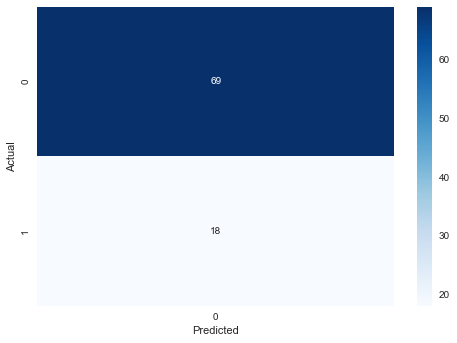

In [15]:
confusion_df = pd.crosstab(y_test, dummy.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_df, annot=True, cmap='Blues')

Since our dummy model is just predicting 0, there are no true positive values and only true negatives. We can still derive accuracy and use it as a baseline for our other models.

In [16]:
print('Dummy Classifier Score on Training Data:', dummy.score(X_train, y_train))
print('Dummy Classifier Score on Testing Data:', dummy.score(X_test, y_test))

Dummy Classifier Score on Training Data: 0.7965116279069767
Dummy Classifier Score on Testing Data: 0.7931034482758621


# Scaling 
Feature scaling limits the range for each variable, so that the variables can be compared.
Feature scaling also helps the algorithm converge more quickly. 
Scaling is especially useful for Euclidean Distance based models.

We will scale our data through standardization, and then input the newly scaled data into logistic regression and SVM models.

The standardization equation is: $$Z = \frac{x-\bar{x}}{\sigma} $$

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [18]:
# scale training data modified by SMOTE
scaler_res = StandardScaler()
scaler_res.fit(X_train_res)
X_train_res_scaled = scaler_res.transform(X_train_res)

# Logistic Regression

In [19]:
lr = LogisticRegression(max_iter=1000, random_state=seed)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [20]:
lr_smote = LogisticRegression(max_iter=1000, random_state=seed)
lr_smote.fit(X_train_res_scaled, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

**Training Results**

Accuracy     0.831395
Recall       0.171429
Precision    1.000000
F1 Score     0.292683
AUC          0.820959
dtype: float64


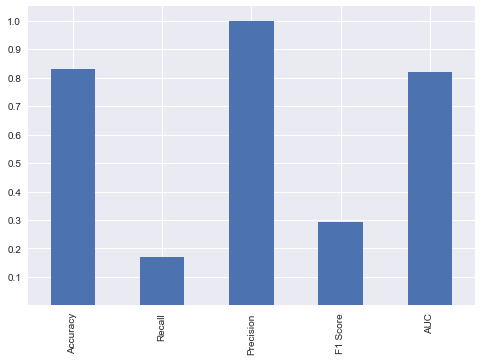

In [21]:
report_metrics(lr, X_train_scaled, y_train)

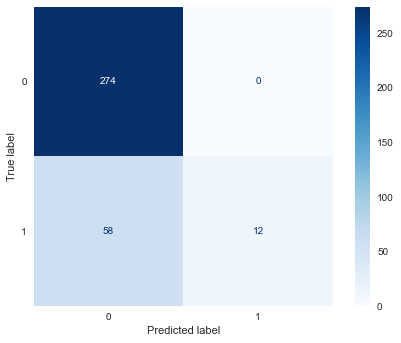

In [22]:
plot_confusion_matrix(lr, X_train_scaled, y_train, cmap='Blues')
plt.grid(None)

Accuracy     0.793796
Recall       0.912409
Precision    0.737463
F1 Score     0.815661
AUC          0.854747
dtype: float64


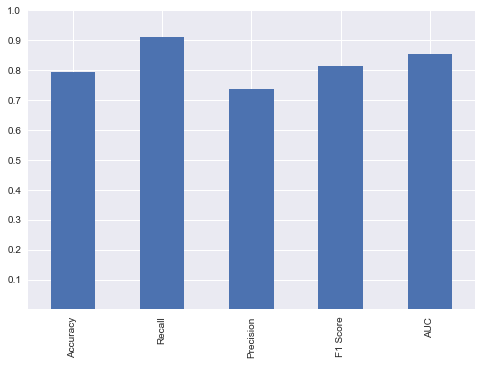

In [23]:
report_metrics(lr_smote, X_train_res_scaled, y_train_res)

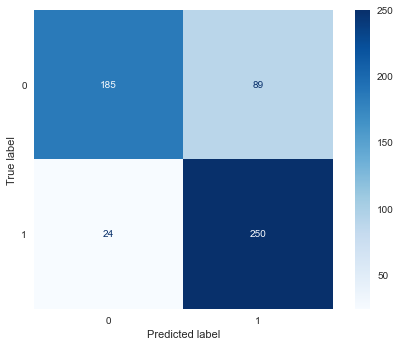

In [24]:
plot_confusion_matrix(lr_smote, X_train_res_scaled, y_train_res, cmap='Blues')
plt.grid(None)

**Testing Results**

Accuracy     0.793103
Recall       0.111111
Precision    0.500000
F1 Score     0.181818
AUC          0.722222
dtype: float64


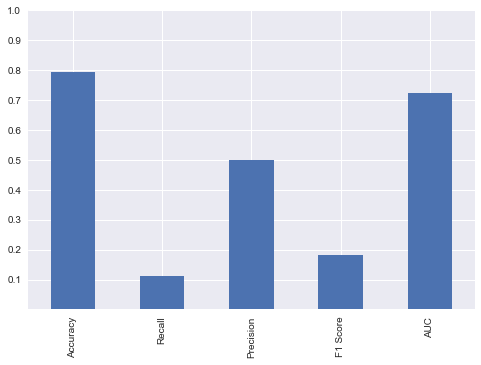

In [25]:
report_metrics(lr, X_test_scaled, y_test, append=True, model_name='lr_base')

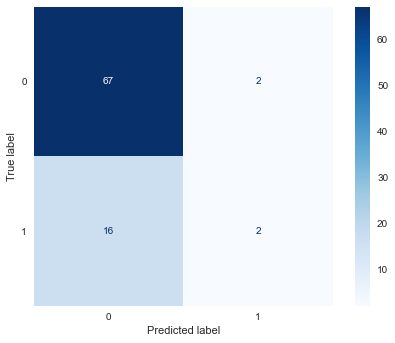

In [26]:
plot_confusion_matrix(lr, X_test_scaled, y_test, cmap='Blues')
plt.grid(None)

Accuracy     0.551724
Recall       0.944444
Precision    0.309091
F1 Score     0.465753
AUC          0.710145
dtype: float64


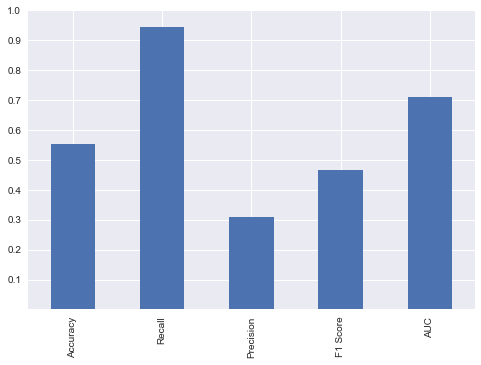

In [27]:
report_metrics(lr_smote, X_test_scaled, y_test, append=True, model_name='lr_smote')

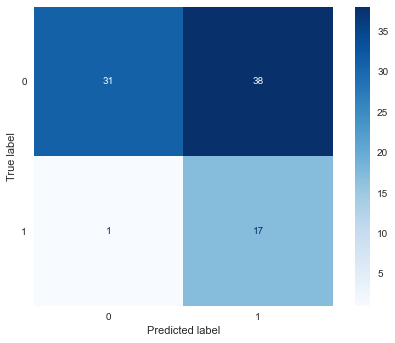

In [28]:
plot_confusion_matrix(lr_smote, X_test_scaled, y_test, cmap='Blues')
plt.grid(None)

### Cross Validation with GridSearch

Since the logistic regression model fit on the SMOTE dataset performed better overall, we will hyperparameter tune it using a gridsearch and cross validation. For logistic regression, the hyperparameter C is the main hyperparameter that affects regularization.
Smaller C values increase the regularization strength leading to more underfitting models;
bigger C values increase the complexity of the model leading to potentially more overfitting 

In [29]:
# Tuning logistic regression model with gridsearch and cross validation
from sklearn.model_selection import GridSearchCV

C_range = [0.001, .01, 0.1, 1, 10, 100] # Inverse of regularization strength. Smaller values = stronger regularization
class_weight = ['balanced']
solvers = ['newton-cg', 'lbfgs'] # optimization algorithm
penalty = ['l2'] # Note: penalty suport is dependent on type of solver. newton-cg and lbfgs can only handle L2
param_grid={'C':C_range,'solver':solvers,'penalty':penalty, 'class_weight':class_weight}


lr_cv1 = GridSearchCV(lr_smote, param_grid, cv=5)
lr_cv1.fit(X_train_res_scaled, y_train_res)

print(lr_cv1.best_params_, lr_cv1.best_score_)

{'C': 100, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'} 0.7628356964136781


In [30]:
C_range = [0.001, .01, 0.1, 1, 10, 100] # Inverse of regularization strength. Smaller values = stronger regularization
solvers = ['liblinear'] # optimization algorithm
penalty = ['l1'] # liblinear can handle L1 penalty
param_grid={'C':C_range,'solver':solvers,'penalty':penalty, 'class_weight':class_weight}


lr_cv2 = GridSearchCV(lr_smote, param_grid, cv=5)
lr_cv2.fit(X_train_res_scaled, y_train_res)

print(lr_cv2.best_params_, lr_cv2.best_score_)

{'C': 10, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'} 0.7628190158465389


Accuracy     0.540230
Recall       0.944444
Precision    0.303571
F1 Score     0.459459
AUC          0.743156
dtype: float64


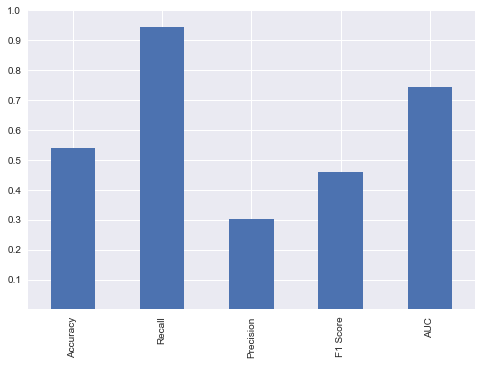

In [31]:
report_metrics(lr_cv1, X_test_scaled, y_test, append=True, model_name='lr_cv1')

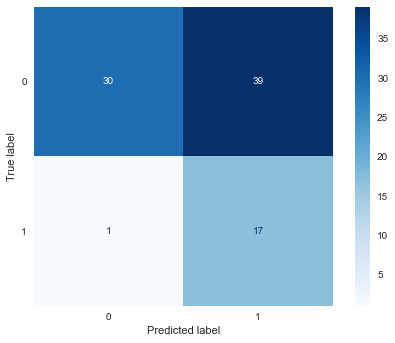

In [32]:
plot_confusion_matrix(lr_cv1, X_test_scaled, y_test, cmap='Blues')
plt.grid(None)

Accuracy     0.505747
Recall       0.944444
Precision    0.288136
F1 Score     0.441558
AUC          0.736715
dtype: float64


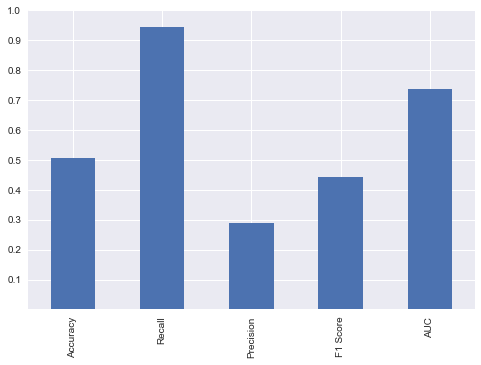

In [33]:
report_metrics(lr_cv2, X_test_scaled, y_test, append=True, model_name='lr_cv2')

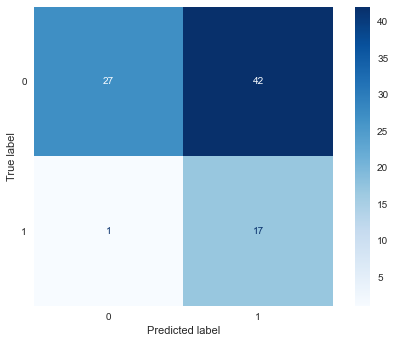

In [34]:
plot_confusion_matrix(lr_cv2, X_test_scaled, y_test, cmap='Blues')
plt.grid(None)

Both iterations of gridsearch perform almost the same. There are also no significant improvements compared to our preliminary models

# Support Vector Machine

**Preliminary SVM Model**

In [35]:
svm = SVC(random_state=seed, probability=True)
svm.fit(X_train_scaled, y_train)

svm_smote = SVC(random_state=seed, probability=True)
svm_smote.fit(X_train_res_scaled, y_train_res)

SVC(probability=True, random_state=42)

**Training Data Results**

Accuracy     0.802326
Recall       0.028571
Precision    1.000000
F1 Score     0.055556
AUC          0.872576
dtype: float64


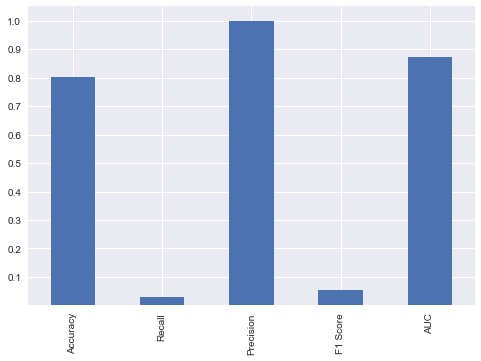

In [36]:
report_metrics(svm, X_train_scaled, y_train)

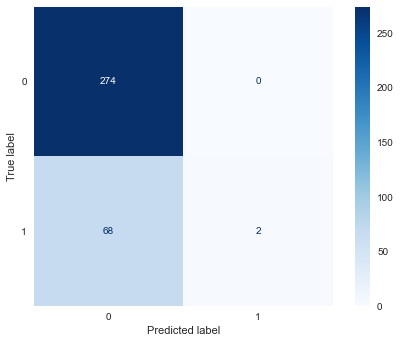

In [37]:
plot_confusion_matrix(svm, X_train_scaled, y_train, cmap='Blues')
plt.grid(None)

Accuracy     0.737226
Recall       0.963504
Precision    0.663317
F1 Score     0.785714
AUC          0.838843
dtype: float64


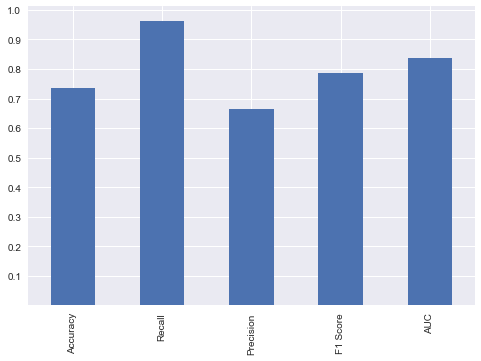

In [38]:
report_metrics(svm_smote, X_train_res_scaled, y_train_res)

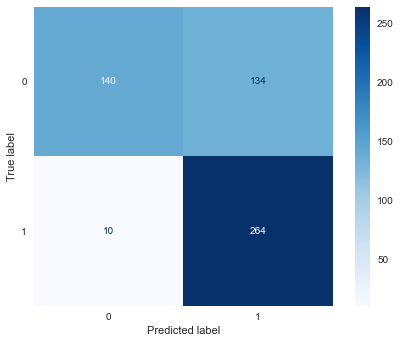

In [39]:
plot_confusion_matrix(svm_smote, X_train_res_scaled, y_train_res, cmap='Blues')
plt.grid(None)

**Testing Data Results**

Accuracy     0.793103
Recall       0.000000
Precision    0.000000
F1 Score     0.000000
AUC          0.678744
dtype: float64


C:\Users\Mateo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


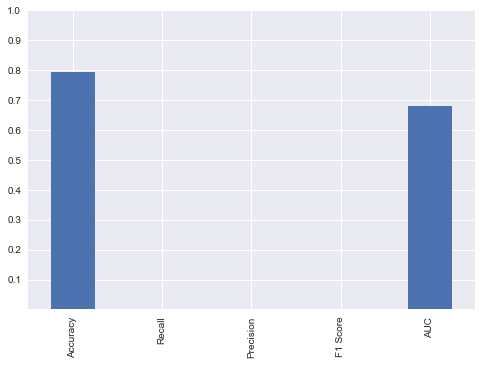

In [40]:
report_metrics(svm, X_test_scaled, y_test, append=True, model_name='svm')

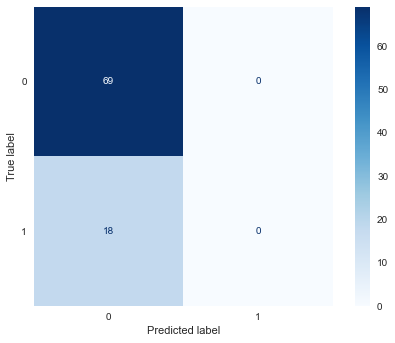

In [41]:
plot_confusion_matrix(svm, X_test_scaled, y_test, cmap='Blues')
plt.grid(None)

Accuracy     0.413793
Recall       0.888889
Precision    0.246154
F1 Score     0.385542
AUC          0.662238
dtype: float64


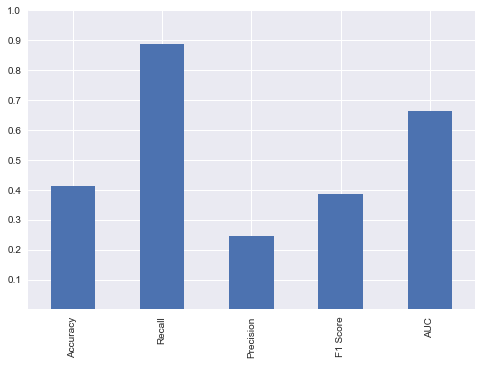

In [42]:
report_metrics(svm_smote, X_test_scaled, y_test, append=True, model_name='svm_smote')

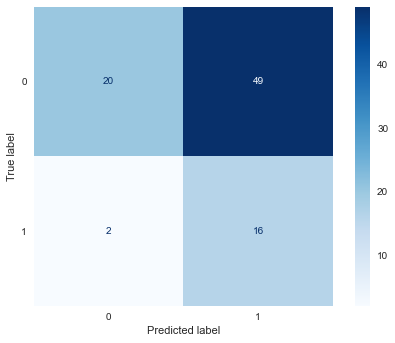

In [43]:
plot_confusion_matrix(svm_smote, X_test_scaled, y_test, cmap='Blues')
plt.grid(None)

The SVM model performs much better when the model is trained on the data modified by SMOTE. 

### Cross Validation with GridSearch

In [44]:
param_grid = {'C': [0.1, 0.5, 1, 10, 100], #adds a penalty for misclassified points. note: Values for C must be > 0
              'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], #larger values lead to overfitting
              'kernel': ['rbf']}

svm_cv = GridSearchCV(svm_smote, param_grid=param_grid, cv=5)
svm_cv.fit(X_train_res_scaled, y_train_res)
print(svm_cv.best_params_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [45]:
param_grid = {'C': [0.1, 0.5, 1, 10, 100],
              'gamma': ['scale',1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['poly']}

svm_poly = GridSearchCV(svm_smote, param_grid=param_grid, cv=5)
svm_poly.fit(X_train_res_scaled, y_train_res)
print(svm_poly.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}


In [46]:
param_grid = {'C': [0.1, 0.5, 1, 10, 100],
              'gamma': ['scale',1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']}

svm_cv_linear = GridSearchCV(svm_smote, param_grid=param_grid, cv=5, verbose=1)
svm_cv_linear.fit(X_train_res_scaled, y_train_res)
print(svm_cv_linear.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.6min finished


{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


Accuracy     0.643678
Recall       0.277778
Precision    0.217391
F1 Score     0.243902
AUC          0.488728
dtype: float64


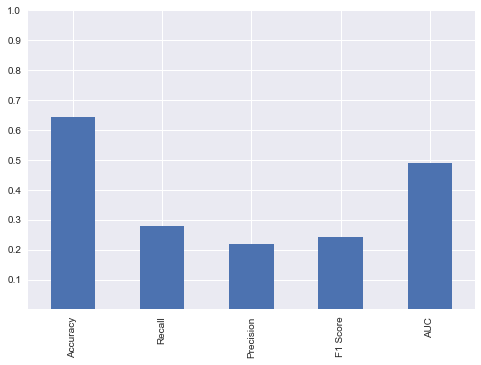

In [47]:
report_metrics(svm_cv, X_test_scaled, y_test, append=True, model_name='svm_cv')

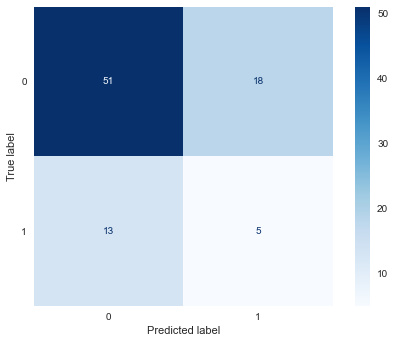

In [48]:
plot_confusion_matrix(svm_cv, X_test_scaled, y_test, cmap='Blues')
plt.grid(None)

Accuracy     0.540230
Recall       0.333333
Precision    0.176471
F1 Score     0.230769
AUC          0.421095
dtype: float64


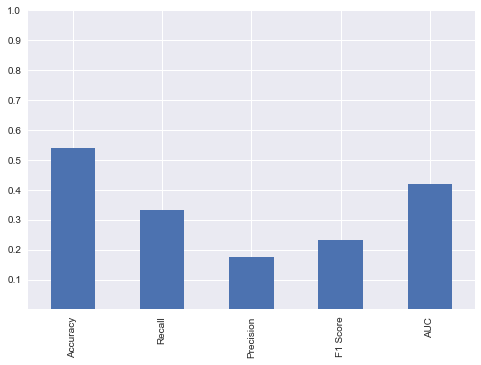

In [49]:
report_metrics(svm_poly, X_test_scaled, y_test, append=True, model_name='svm_poly')

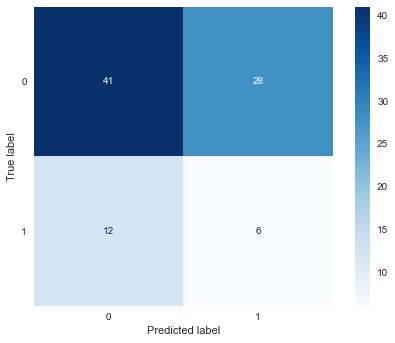

In [50]:
plot_confusion_matrix(svm_poly, X_test_scaled, y_test, cmap='Blues')
plt.grid(None)

Accuracy     0.528736
Recall       0.944444
Precision    0.298246
F1 Score     0.453333
AUC          0.717391
dtype: float64


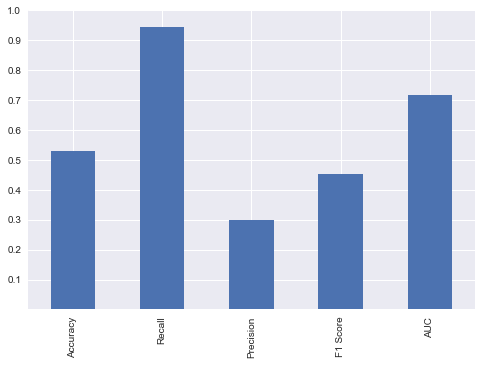

In [51]:
report_metrics(svm_cv_linear, X_test_scaled, y_test, append=True, model_name='svm_cv_linear')

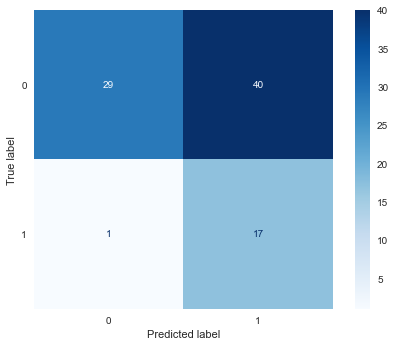

In [52]:
plot_confusion_matrix(svm_cv_linear, X_test_scaled, y_test, cmap='Blues')
plt.grid(None)

Of the three SVM models we trained, the model using a linear kernel performed the best. These results suggests that our data could have a linear decision boundary. However, the linear kernel did require more time to train than other models.

# Random Forest

**Preliminary Random Forest Model**

In [53]:
# Random forest fit without SMOTE
rf = RandomForestClassifier(random_state=seed)
rf.fit(X_train, y_train)

# random forest fit with SMOTE
rf_smote = RandomForestClassifier(random_state=seed)
rf_smote.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

**Training Results**

Accuracy     1.0
Recall       1.0
Precision    1.0
F1 Score     1.0
AUC          1.0
dtype: float64


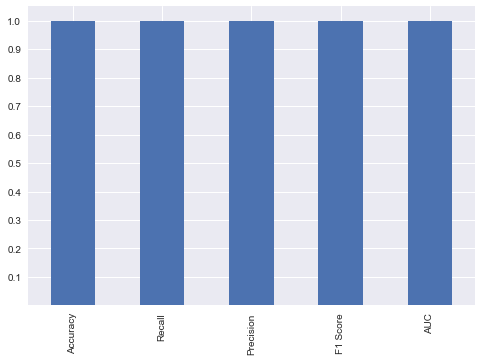

In [54]:
report_metrics(rf, X_train, y_train)

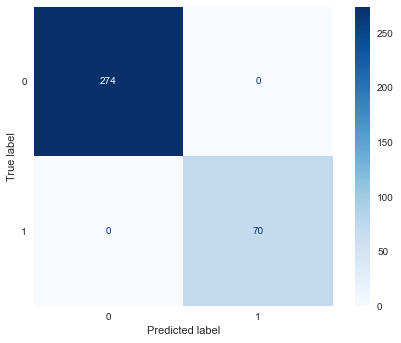

In [55]:
plot_confusion_matrix(rf, X_train, y_train, cmap='Blues')
plt.grid(None)

As expected, the preliminary random forest model will overfit to the training data

**Testing Results**

Accuracy     0.793103
Recall       0.055556
Precision    0.500000
F1 Score     0.100000
AUC          0.765700
dtype: float64


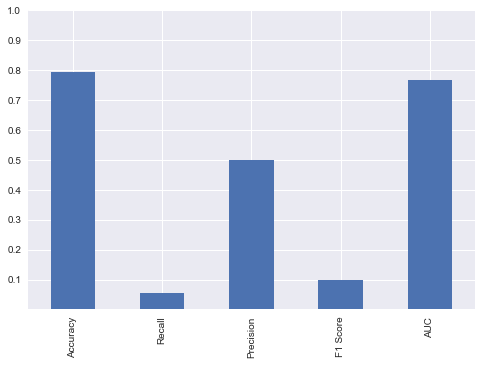

In [56]:
report_metrics(rf, X_test, y_test, append=True, model_name='rf')

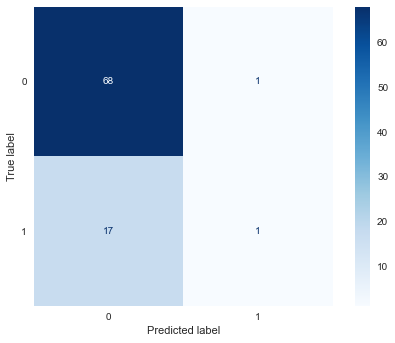

In [57]:
plot_confusion_matrix(rf, X_test, y_test, cmap='Blues')
plt.grid(None)

Accuracy     0.758621
Recall       0.388889
Precision    0.411765
F1 Score     0.400000
AUC          0.702496
dtype: float64


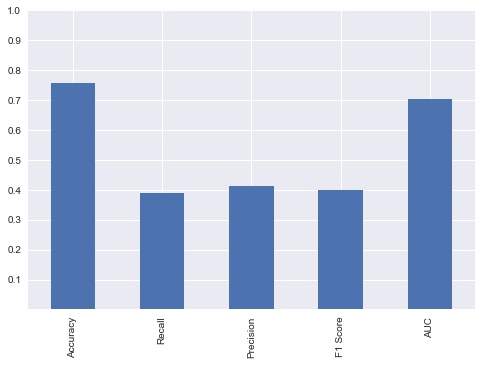

In [58]:
report_metrics(rf_smote, X_test, y_test, append=True, model_name='rf_smote')

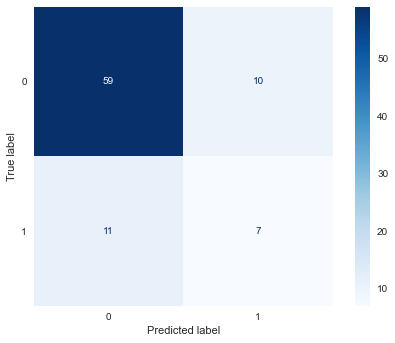

In [59]:
plot_confusion_matrix(rf_smote, X_test, y_test, cmap='Blues')
plt.grid(None)

The random forest model performs much better when the model is trained on the data modified by SMOTE. 

**Feature Importance**

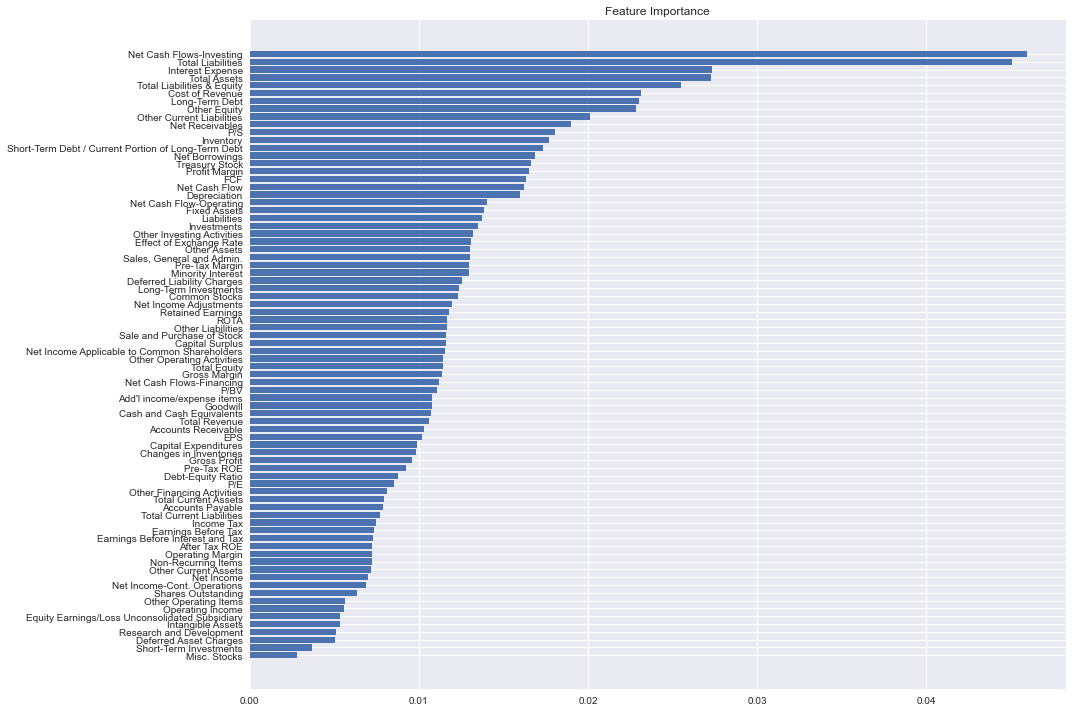

In [60]:
feature_importance = rf_smote.feature_importances_

# Return the indices that would sort the array
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(15,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

### Optimize Hyperparameters using Randomized Search and  Cross Validation


In [61]:
#Hyperparameters

# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num=5)]
# minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# minimum number of samples required at each leaf node
min_samples_leaf = [1,2, 4, 8]
# method of selecting samples for training each tree
bootstrap=[True, False]

In [62]:
# Randomized Search
param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap}

rf_cv = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                             cv=5, verbose=1, n_iter=100, n_jobs=8)

rf_cv_smote = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                             cv=5, verbose=1, n_iter=100, n_jobs=8)

In [63]:
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   26.8s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=8,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=1)

C:\Users\Mateo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy     0.793103
Recall       0.000000
Precision    0.000000
F1 Score     0.000000
AUC          0.804348
dtype: float64


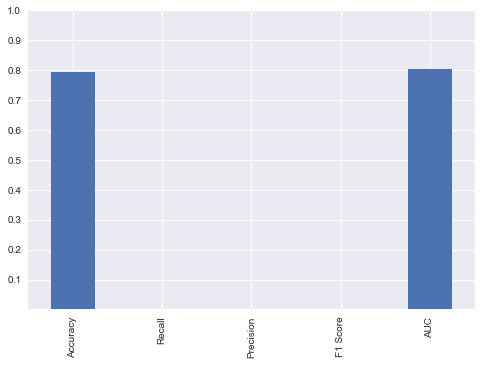

In [64]:
report_metrics(rf_cv, X_test, y_test, append=True, model_name='rf_cv')

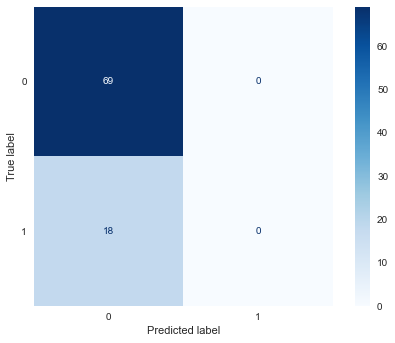

In [65]:
plot_confusion_matrix(rf_cv, X_test, y_test, cmap='Blues')
plt.grid(None)

In [66]:
rf_cv_smote.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   42.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=8,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=1)

Accuracy     0.735632
Recall       0.166667
Precision    0.272727
F1 Score     0.206897
AUC          0.722222
dtype: float64


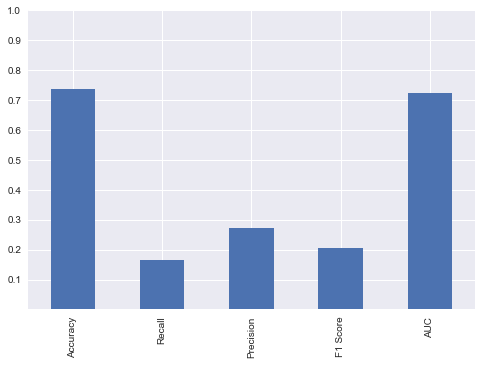

In [67]:
report_metrics(rf_cv_smote, X_test, y_test, append=True, model_name='rf_cv_smote')

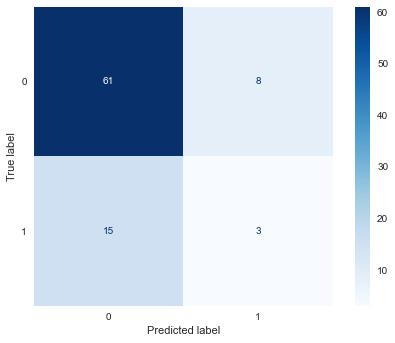

In [68]:
plot_confusion_matrix(rf_cv_smote, X_test, y_test, cmap='Blues')
plt.grid(None)

Both iterations of Random Forest excel for certain metrics and fall short for others. The model with unmodified data tends to predict zero, which leads to a very low recall score, but a high precision. A closer look through the confusion matrix shows that only four 1s were predicted. On the other hand, the model using SMOTE has a higher recall score but lower precision. The f1 score also improved. It is difficult to pick one of the two models and is dependent on the specific use case.  

# XGBoost
XGBoost is a  type of gradient boosting tree algorithm that is designed for speend and performance

In [69]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                           eval_metric='logloss',
                           seed=seed,
                           use_label_encoder=False, random_state=seed)

clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [70]:
clf_xgb_smote = xgb.XGBClassifier(objective='binary:logistic',
                           eval_metric='logloss',
                           seed=seed,
                           use_label_encoder=False, random_state=seed)

clf_xgb_smote.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

**Training Results**

Accuracy     1.0
Recall       1.0
Precision    1.0
F1 Score     1.0
AUC          1.0
dtype: float64


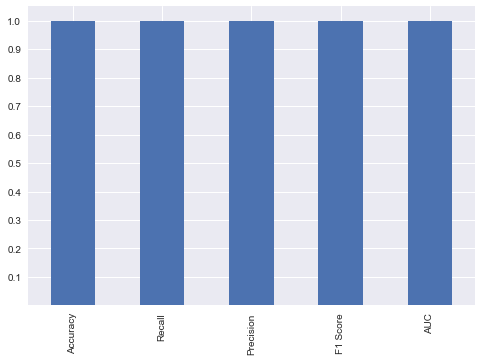

In [71]:
report_metrics(clf_xgb, X_train, y_train)

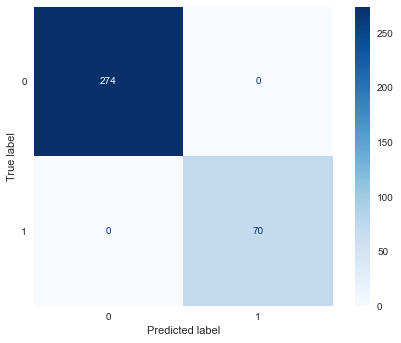

In [72]:
plot_confusion_matrix(clf_xgb, X_train, y_train, cmap='Blues')
plt.grid(None)

XGBoost like Random Forest also overfits to the training data. Let's see how it performs on the testing data

**Model Results for Testing Data**

Accuracy     0.816092
Recall       0.388889
Precision    0.583333
F1 Score     0.466667
AUC          0.836554
dtype: float64


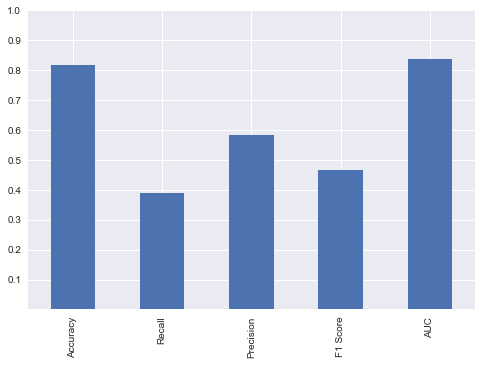

In [73]:
report_metrics(clf_xgb, X_test, y_test, append=True, model_name='clf_xgb')

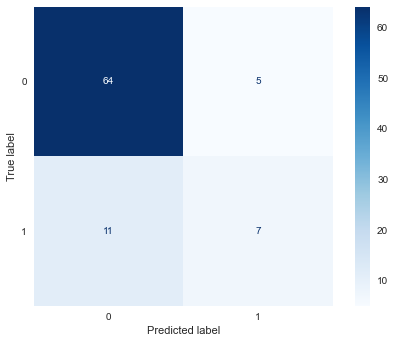

In [74]:
plot_confusion_matrix(clf_xgb, X_test, y_test, cmap='Blues')
plt.grid(None)

Accuracy     0.724138
Recall       0.277778
Precision    0.312500
F1 Score     0.294118
AUC          0.702093
dtype: float64


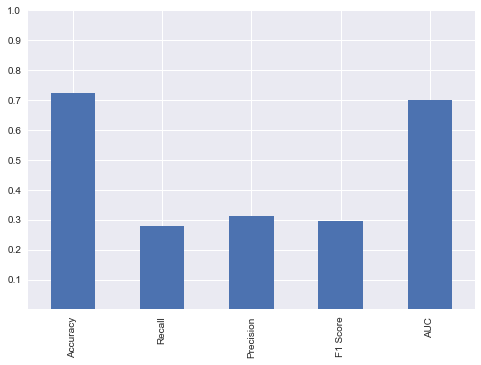

In [75]:
report_metrics(clf_xgb_smote, X_test, y_test, append=True, model_name='xgb_smote')

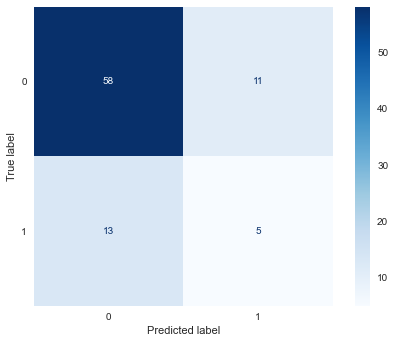

In [76]:
plot_confusion_matrix(clf_xgb_smote, X_test, y_test, cmap='Blues')
plt.grid(None)

The preliminary base model performs surprisngly well. Let's see if hyperparameter tuning improves the model at all

### Optimize Hyperparameters using Cross Validation and GridSearch

In [77]:
# Randomized Search
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8], # max depth allowed for a tree
    'n_estimators': range(5, 50, 10), # number of  trees 
    'learning_rate': [0.3, 0.1, 0.01, 0.05], # step size shrinkage; controls overfitting; range [0,1]
    'gamma': [0, 0.25, 0.5, 1.0], # minimum loss reduction for a split. higher values lead to fewer splits
    'reg_lambda': [0, 1.0, 10.0, 100.0], #L2 regularization
    'colsample_bytree':[.5, .75, 1], # percetnage of features used per tree
}

xgb_cv = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric="logloss", seed=seed,
                                random_state=seed, use_label_encoder=False),
    param_distributions=param_grid,
    verbose=1, # NOTE: If you want to see what Randomized Search is doing can set verbose higher
    n_jobs = 8,
    cv = 5,
    n_iter=1000)

In [78]:
xgb_cv.fit(X_train, y_train)
print(xgb_cv.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 1200 tasks      | elapsed:   11.9s
[Parallel(n_jobs=8)]: Done 3200 tasks      | elapsed:   32.5s


{'reg_lambda': 10.0, 'n_estimators': 45, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.25, 'colsample_bytree': 0.5}


[Parallel(n_jobs=8)]: Done 4985 out of 5000 | elapsed:   51.3s remaining:    0.1s
[Parallel(n_jobs=8)]: Done 5000 out of 5000 | elapsed:   51.3s finished


In [79]:
xgb_cv_smote = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric="logloss", seed=seed,
                                random_state=seed, use_label_encoder=False),
    param_distributions=param_grid,
    verbose=1, 
    n_jobs = 8,
    cv = 5,
    n_iter=1000)


xgb_cv_smote.fit(X_train_res, y_train_res)
print(xgb_cv.best_params_)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 352 tasks      | elapsed:    6.2s
[Parallel(n_jobs=8)]: Done 852 tasks      | elapsed:   14.3s
[Parallel(n_jobs=8)]: Done 1552 tasks      | elapsed:   24.4s
[Parallel(n_jobs=8)]: Done 2452 tasks      | elapsed:   40.1s
[Parallel(n_jobs=8)]: Done 3552 tasks      | elapsed:   59.2s
[Parallel(n_jobs=8)]: Done 4852 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 4985 out of 5000 | elapsed:  1.4min remaining:    0.2s


{'reg_lambda': 10.0, 'n_estimators': 45, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.25, 'colsample_bytree': 0.5}


[Parallel(n_jobs=8)]: Done 5000 out of 5000 | elapsed:  1.4min finished


Accuracy     0.804598
Recall       0.111111
Precision    0.666667
F1 Score     0.190476
AUC          0.760870
dtype: float64


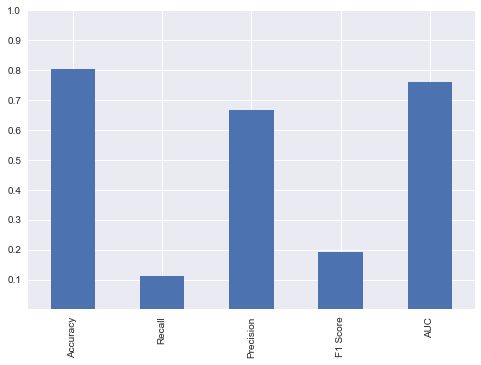

In [80]:
report_metrics(xgb_cv, X_test, y_test, append=True, model_name='xgb_cv')

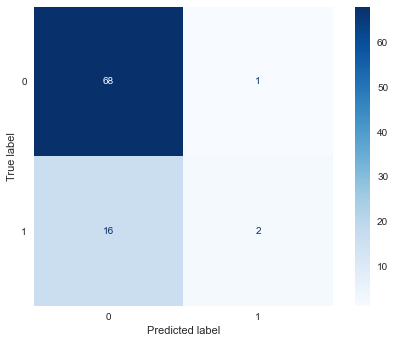

In [81]:
plot_confusion_matrix(xgb_cv, X_test, y_test, cmap='Blues')
plt.grid(None)

Accuracy     0.701149
Recall       0.388889
Precision    0.318182
F1 Score     0.350000
AUC          0.687601
dtype: float64


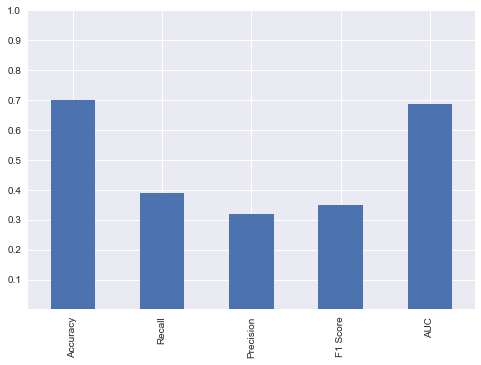

In [82]:
report_metrics(xgb_cv_smote, X_test, y_test, append=True, model_name='xgb_cv_smote')

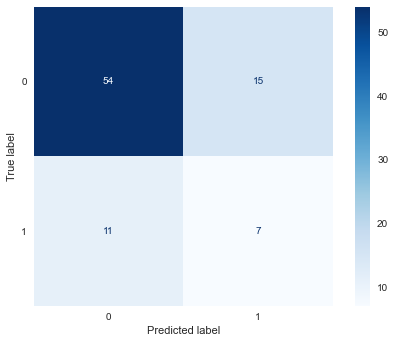

In [83]:
plot_confusion_matrix(xgb_cv_smote, X_test, y_test, cmap='Blues')
plt.grid(None)

# Summary Score Table 

In [84]:
scores_dict ={'model':list_model, 'accuracy':list_accuracy,'recall':list_recall,
                         'precision':list_precision, 'f1 score':list_f1, 'auc':list_auc}

df_scores = pd.DataFrame(scores_dict)
df_scores

,model,accuracy,recall,precision,f1 score,auc
0,lr_base,0.793103,0.111111,0.500000,0.181818,0.722222
1,lr_smote,0.551724,0.944444,0.309091,0.465753,0.710145
2,lr_cv1,0.540230,0.944444,0.303571,0.459459,0.743156
3,lr_cv2,0.505747,0.944444,0.288136,0.441558,0.736715
4,svm,0.793103,0.000000,0.000000,0.000000,0.678744
5,svm_smote,0.413793,0.888889,0.246154,0.385542,0.662238
6,svm_cv,0.643678,0.277778,0.217391,0.243902,0.488728
7,svm_poly,0.540230,0.333333,0.176471,0.230769,0.421095
8,svm_cv_linear,0.528736,0.944444,0.298246,0.453333,0.717391
9,rf,0.793103,0.055556,0.500000,0.100000,0.765700


For evaluation, we will pay particularly close attention to the F1-score as it will indicate that our model is not just predicting one class. For example for our baseline svm model, it predicts only 0, which is the majority class. Thus even though it has high accuracy, it has an f1 score of 0.

For each model type, which model performed the best?
- Logistic Regression: chose the baseline logistic regression model using SMOTE (lr_smote), although each model performed very similarly. 

- SVM:  svm model using a linear kernel that we hyperparameter tuned (svm_cv_linear)

- Random Forest: baseline random forest using SMOTE (rf_smote)

- XGB: Surprisingly, the xgb baseline model (clf_xgb) performed the best on all metrics compared to all the other XGB model

# ROC Curve

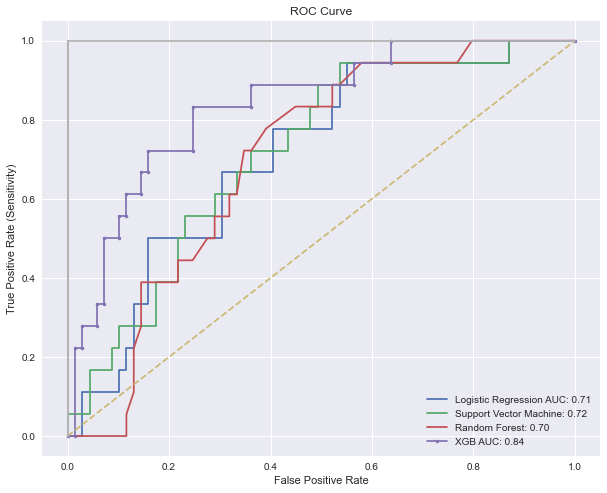

In [85]:
# Probabilities of labeled as 1
log_prob = lr_smote.predict_proba(X_test_scaled)[:,1]
svm_prob = svm_cv_linear.predict_proba(X_test_scaled)[:,1]
rf_prob = rf_smote.predict_proba(X_test)[:,1]
xgb_prob = clf_xgb.predict_proba(X_test)[:,1]

# fpr, tpr, threshold values
log_fpr, log_tpr, log_threshold = roc_curve(y_test, log_prob)
svm_fpr, svm_tpr, svm_threshold = roc_curve(y_test, svm_prob)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf_prob)
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_test, xgb_prob)

# AUC Scores
lr_auc = roc_auc_score(y_test, log_prob)
svm_auc = roc_auc_score(y_test, svm_prob)
rf_auc = roc_auc_score(y_test, rf_prob)
xgb_auc = roc_auc_score(y_test, xgb_prob)
    
plt.figure(figsize=(10,8))

plt.plot(log_fpr, log_tpr, label='Logistic Regression AUC: {:.2f}'.format(lr_auc))
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine: {:.2f}'.format(svm_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest: {:.2f}'.format(rf_auc))
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGB AUC: {:.2f}'.format(xgb_auc))
 
plt.plot([0, 1], linestyle='--') # diagonal line indicating AUC of 0.5
plt.plot([0,0],[1, 0] , c=".7"), plt.plot([0,0],[1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()

Using solely AUC of the ROC curve, XGBoost performed the best followed by Random Forest. 

**Top Models for Each Model Type**

In [86]:
top_models = ['lr_smote','svm_cv_linear','rf_smote', 'clf_xgb']
df_scores[df_scores['model'].isin(top_models)]

,model,accuracy,recall,precision,f1 score,auc
1,lr_smote,0.551724,0.944444,0.309091,0.465753,0.710145
8,svm_cv_linear,0.528736,0.944444,0.298246,0.453333,0.717391
10,rf_smote,0.758621,0.388889,0.411765,0.400000,0.702496
13,clf_xgb,0.816092,0.388889,0.583333,0.466667,0.836554


Overall, the XGBoost model performs the best on every metric except recall. If choosing between precision and recall, precision is preferred as we want to ensure that the stocks we do choose as returning 20% are indeed correctly predicted.

# Using the XGBoost Model

### What stocks does our model predict will garner at least 20% returns?

I will now run these XGBoost model on all of X, i.e. both the train and test datasets, to find the stocks that were predicted to return 20%

In [87]:
model_pred = pd.DataFrame(clf_xgb.predict(X), index=df.index, columns=['prediction'])

tickers_model_1 = list(model_pred[model_pred['prediction']==1].index)
tickers_model_0 = list(model_pred[model_pred['prediction']==0].index)

In [88]:
model_pred.loc[tickers_model_1].index

Index(['AAP', 'HBI', 'VFC', 'SNA', 'NVDA', 'LOW', 'BBY', 'ROST', 'TGT', 'DLTR',
       'JWN', 'SIG', 'LB', 'ULTA', 'KMX', 'STZ', 'RL', 'MCK', 'EA', 'DRI',
       'CAG', 'GPN', 'FDX', 'CTAS', 'LRCX', 'CAH', 'AZO', 'AYI', 'HOLX',
       'SBUX', 'V', 'DHI', 'TDG', 'ABC', 'SWKS', 'HRL', 'ADI', 'ADBE', 'PKI',
       'HAS', 'VRSN', 'ROP', 'TSS', 'TSO', 'LKQ', 'RCL', 'LLY', 'VRSK', 'REGN',
       'MDLZ', 'TRIP', 'VLO', 'NDAQ', 'NFX', 'UDR', 'NFLX', 'ORLY', 'TAP',
       'MAS', 'MAA', 'MCD', 'MNST', 'MLM', 'MHK', 'VMC', 'FSLR', 'BSX', 'EQIX',
       'FBHS', 'CNC', 'EXR', 'EXPE', 'CI', 'FISV', 'ALK', 'DPS', 'ATVI', 'EFX',
       'AMZN', 'HUM', 'AN', 'EW'],
      dtype='object', name='symbol')

### Do these predicted stocks happen to belong to certain sectors?

In [89]:
securities_df = pd.read_csv('Datasets/securities.csv', index_col='Ticker symbol')
securities_df = securities_df.merge(model_pred, how='inner', left_index=True, right_index=True)

In [90]:
securities_df.loc[tickers_model_1]['GICS Sector'].value_counts()

Consumer Discretionary    29
Information Technology    14
Health Care               12
Industrials               10
Consumer Staples           7
Real Estate                4
Energy                     3
Materials                  2
Financials                 1
Name: GICS Sector, dtype: int64

In [91]:
securities_df.loc[tickers_model_0]['GICS Sector'].value_counts()

Industrials                    52
Consumer Discretionary         48
Financials                     46
Information Technology         42
Health Care                    37
Energy                         28
Utilities                      24
Consumer Staples               24
Real Estate                    22
Materials                      21
Telecommunications Services     5
Name: GICS Sector, dtype: int64

In [92]:
# Percentage of the total
# NOTE: 1s are minority class
(securities_df.loc[tickers_model_1]['GICS Sector'].value_counts() 
 / securities_df['GICS Sector'].value_counts() * 100).sort_values(ascending=False)

Consumer Discretionary         37.662338
Information Technology         25.000000
Health Care                    24.489796
Consumer Staples               22.580645
Industrials                    16.129032
Real Estate                    15.384615
Energy                          9.677419
Materials                       8.695652
Financials                      2.127660
Telecommunications Services          NaN
Utilities                            NaN
Name: GICS Sector, dtype: float64

In [93]:
sum(df['target']==1)/ len(df['target'])

0.20417633410672853

###  Final dataframe that includes predictions

In [94]:
df_final = pd.concat([model_pred, df], axis=1, join='inner')
df_final.head()

,prediction,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Treasury Stock,target,EPS,Shares Outstanding,ROTA,Debt-Equity Ratio,FCF,P/E,P/BV,P/S
symbol,,,,,,,,,,,,,,,,,,,,,
K,0,1.432000e+09,-50000000.0,4000000.0,51.0,-637000000.0,6.260000e+08,2.730000e+08,112000000.0,105000000.0,...,-2.999000e+09,0,4.98,3.628514e+08,0.183598,3.365021,2.444000e+09,12.244980,6.241658,1.495854
SWK,0,2.772400e+09,-500000.0,-7800000.0,7.0,-340300000.0,4.878600e+09,4.962000e+08,-101900000.0,442300000.0,...,-1.454400e+09,0,3.16,1.486392e+08,0.045219,1.431918,1.208300e+09,25.636077,1.770983,1.105768
AAP,1,2.609239e+09,-32428000.0,2698000.0,26.0,-195757000.0,5.312930e+08,1.112471e+09,-203513000.0,7000.0,...,-1.078900e+08,1,5.36,7.308918e+07,0.119145,2.670199,7.410070e+08,20.507462,5.298731,1.237172
AVY,0,1.477200e+09,-136000000.0,-36600000.0,14.0,-129200000.0,8.123000e+08,3.516000e+08,-75900000.0,124100000.0,...,-1.172200e+09,0,2.19,9.735160e+07,0.092591,2.089800,4.488000e+08,23.050228,3.293331,0.800376
CERN,0,3.765790e+08,-9599000.0,12042000.0,13.0,-352877000.0,8.128530e+08,2.023770e+08,-8111000.0,3443000.0,...,-2.825100e+07,0,1.16,3.434086e+08,0.143485,0.293813,1.048742e+09,47.913795,6.025466,6.557301


### Which stocks did the model incorrectly classify?
- False Positives (Type I Error)
- False Negatives (Type II Error)

In [95]:
error = df_final[df_final['prediction']!=df_final['target']]

false_positive =error[error['prediction']==1] 
false_positive

,prediction,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Treasury Stock,target,EPS,Shares Outstanding,ROTA,Debt-Equity Ratio,FCF,P/E,P/BV,P/S
symbol,,,,,,,,,,,,,,,,,,,,,
RL,1,9.700000e+08,-104000000.0,11000000.0,19.0,-390000000.0,1.979000e+09,797000000.0,-77000000.0,1000000.0,...,-3.317000e+09,0,8.55,9.076023e+07,0.183311,0.509172,1.297000e+09,18.507603,3.560213,1.927772
TDG,1,3.466120e+08,-24309000.0,-131622000.0,20.0,-34146000.0,7.947670e+08,819548000.0,-8392000.0,538000.0,...,-1.759400e+08,0,1.91,1.606859e+08,0.117836,-5.342171,5.753680e+08,96.507854,-19.034281,12.482258
LKQ,1,6.503660e+08,-61739000.0,2562000.0,14.0,-140950000.0,1.054686e+09,114605000.0,-122590000.0,3035000.0,...,0.000000e+00,0,1.25,3.060400e+08,0.119149,1.012653,5.118470e+08,22.496001,3.163150,1.276819
TRIP,1,1.530000e+08,-26000000.0,-9000000.0,20.0,-81000000.0,6.730000e+08,455000000.0,0.0,0.0,...,-1.450000e+08,0,1.58,1.430380e+08,0.169918,0.731556,4.680000e+08,47.253167,9.492636,8.570799
AN,1,2.355400e+09,-80300000.0,1500000.0,20.0,-209200000.0,6.180000e+07,75400000.0,-27300000.0,1600000.0,...,-1.747900e+09,0,3.57,1.172829e+08,0.097896,3.053714,6.943000e+08,16.921569,3.419266,0.370775


In [96]:
false_negative = error[error['prediction']==0]
false_negative

,prediction,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Treasury Stock,target,EPS,Shares Outstanding,ROTA,Debt-Equity Ratio,FCF,P/E,P/BV,P/S
symbol,,,,,,,,,,,,,,,,,,,,,
KR,0,6.279000e+09,-8.000000e+06,0.0,28.0,-2.330000e+09,3.549000e+09,4.010000e+08,-131000000.0,959000000.0,...,-9.641000e+09,1,2.93,5.184300e+08,0.093064,4.438522,5.903000e+09,6.160409,1.738050,0.095122
M,0,5.263000e+09,-5.800000e+07,2000000.0,24.0,-6.070000e+08,2.522000e+09,2.273000e+09,-249000000.0,4000000.0,...,-1.847000e+09,1,3.93,3.781170e+08,0.123959,2.459754,3.156000e+09,13.536896,3.219047,0.720197
FL,0,6.230000e+08,0.000000e+00,4000000.0,17.0,-2.060000e+08,0.000000e+00,8.580000e+08,-20000000.0,0.0,...,0.000000e+00,1,2.89,1.484429e+08,0.191569,0.397035,7.360000e+08,13.356401,2.295631,0.880845
SPLS,0,3.264468e+09,-5.400000e+07,5000000.0,10.0,-3.710000e+08,4.866467e+09,4.925320e+08,-81000000.0,563000.0,...,-5.229368e+09,1,0.95,6.526316e+08,0.105773,0.822309,1.479000e+09,13.852632,1.400565,0.371577
HD,0,9.379000e+09,-1.500000e+07,12000000.0,43.0,-1.389000e+09,8.402000e+09,1.929000e+09,-455000000.0,88000000.0,...,-1.919400e+10,1,3.78,1.424603e+09,0.226517,2.235745,9.017000e+09,20.330687,8.743072,1.389138
PAYX,0,2.271000e+08,-2.210000e+07,5400000.0,35.0,-8.410000e+07,7.944000e+08,4.351100e+09,0.0,3600000.0,...,0.000000e+00,1,1.72,3.648256e+08,0.155115,2.584750,9.650000e+08,23.901163,8.440056,5.954178
NKE,0,4.853000e+09,-2.980000e+08,-103000000.0,25.0,-8.800000e+08,5.865000e+09,2.220000e+09,-505000000.0,3000000.0,...,0.000000e+00,1,1.49,1.812000e+09,0.190599,0.717849,3.893000e+09,25.808726,6.437589,2.506582
INTU,0,4.070000e+08,-5.000000e+06,31000000.0,29.0,-1.040000e+08,3.558000e+09,8.490000e+08,0.0,3000000.0,...,-6.430000e+09,1,3.18,2.852201e+08,0.255912,0.689734,1.550000e+09,25.776730,7.595677,5.510133
FB,0,1.042000e+09,-6.100000e+08,0.0,8.0,-1.831000e+09,3.022500e+10,4.315000e+09,0.0,0.0,...,0.000000e+00,1,1.12,2.611607e+09,0.122854,0.107214,9.157000e+09,69.660712,5.644880,16.345065
